# Proyecto de clustering de segmentación de países por datos socio-económicos

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

## Carga de datos

In [2]:
df_country = pd.read_csv('Country-data.csv')
df_country.sample(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
72,Iraq,36.9,39.4,8.41,34.1,12700,16.60,67.2,4.56,4500
74,Israel,4.6,35.0,7.63,32.9,29600,1.77,81.4,3.03,30600
90,Lithuania,6.1,65.3,7.04,67.2,21100,2.38,73.2,1.50,12000
130,Serbia,7.6,32.9,10.40,47.9,12700,5.88,74.7,1.40,5410
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
153,Turkey,19.1,20.4,6.74,25.5,18000,7.01,78.2,2.15,10700
116,Pakistan,92.1,13.5,2.20,19.4,4280,10.90,65.3,3.85,1040


# Variables del dataset 

- **country**: Nombre del país
- **child_mort**: Muertes de niños menores de 5 años por cada 1000 nacimientos.
- **exports**: Exportación de bienes y servicios per capita. Dado porcentaje del GDP (PIB) per capita.
- **health**: Gasto total en salud. Dado porcentaje del GDP (PIB) per capita.
- **imports**: Importación de bienes y servicios per capita. Dado porcentaje del GDP (PIB) per capita.
- **income**: Ingreso neto por persona.
- **inflation**: La medición de la tasa total de crecimiento anual del GDP total.
- **life_expec**: Número promedio de años que viviría un recien nacido si se mantienen los patrones de mortalidad actuales.
- **total_fer**: El número de hijos que nacerían de cada mujer si se mantienen las tasas actuales de fecundidad.
- **gdp**: El PBI per capita. Calculado a partir de la división del PBI total entre el número de habitantes.

In [3]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Manejando valores nulos

In [5]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Validando duplicados

In [6]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Análisis de distribución

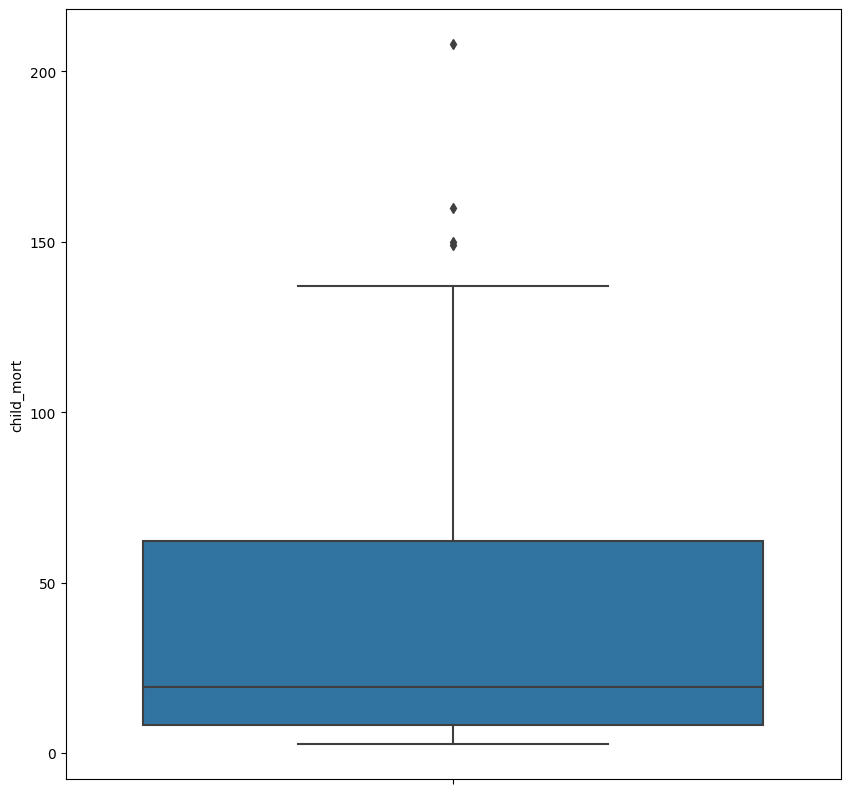

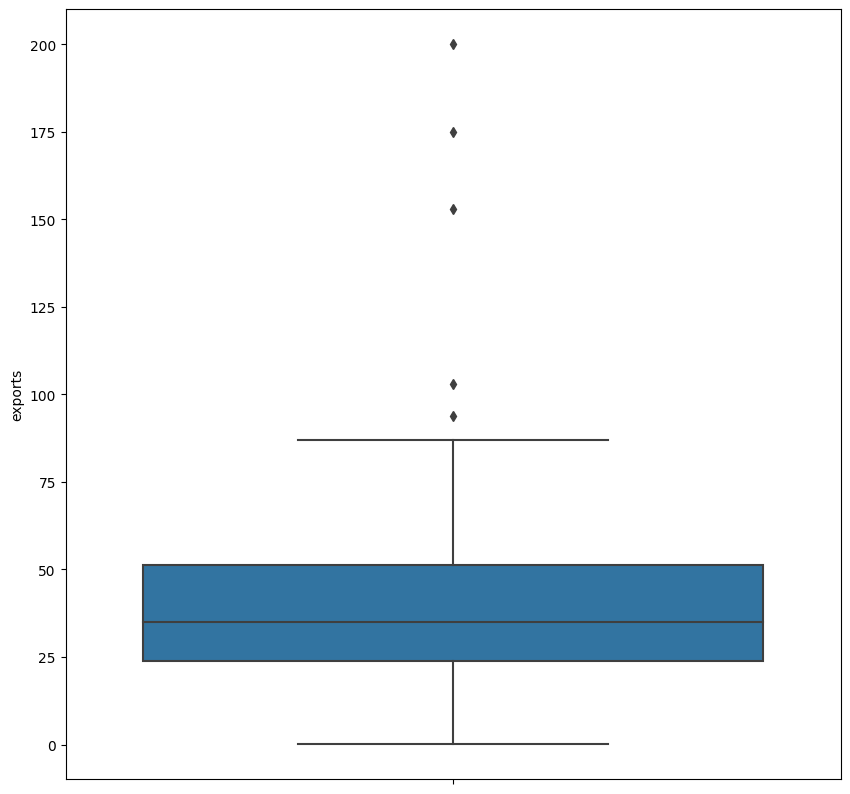

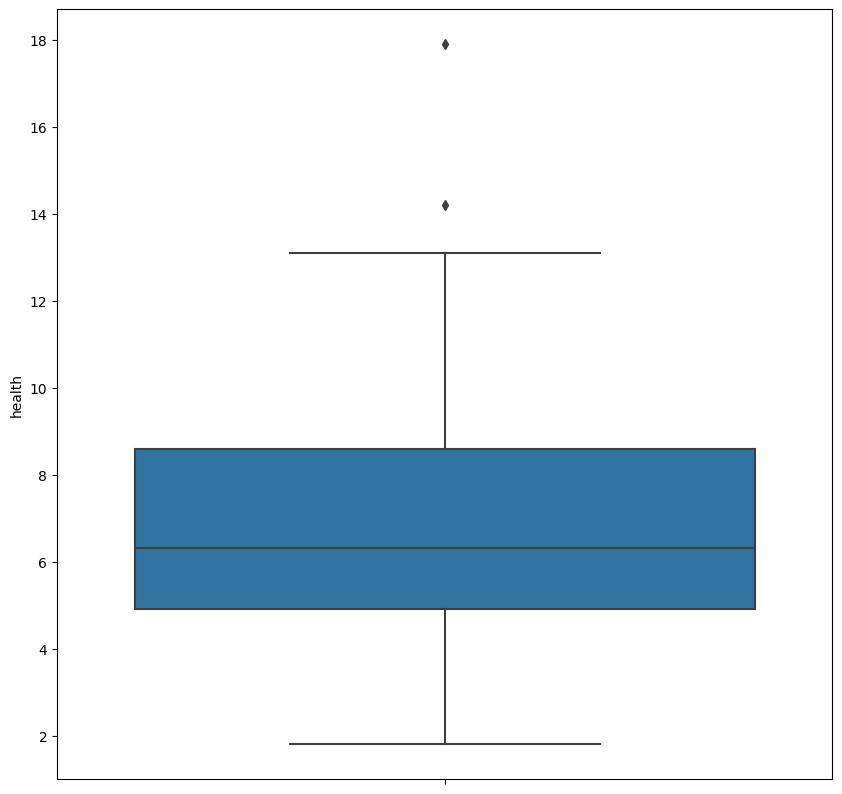

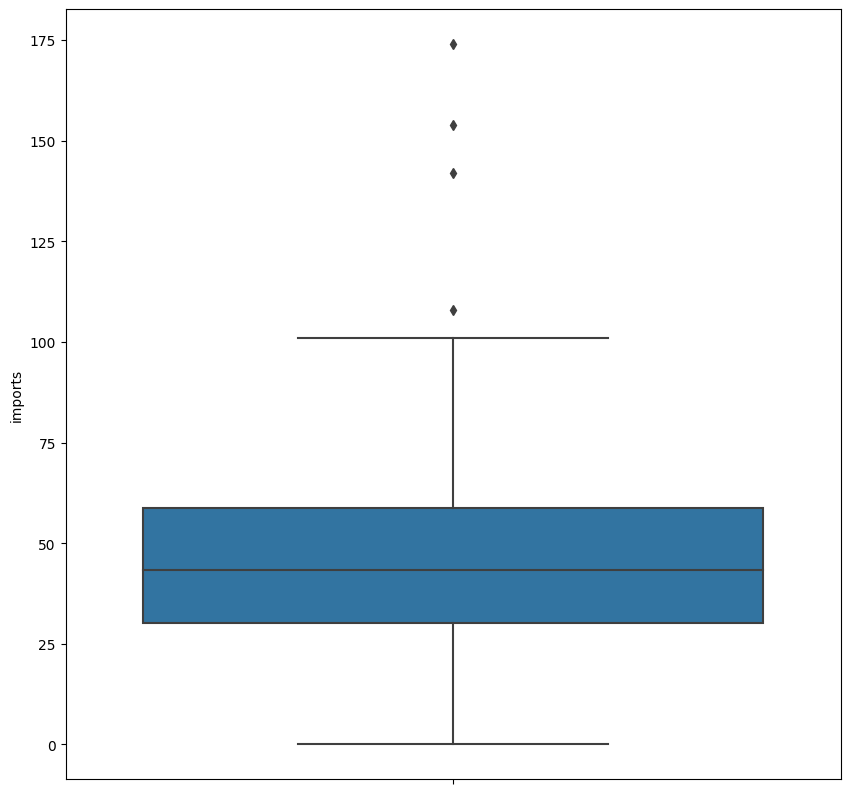

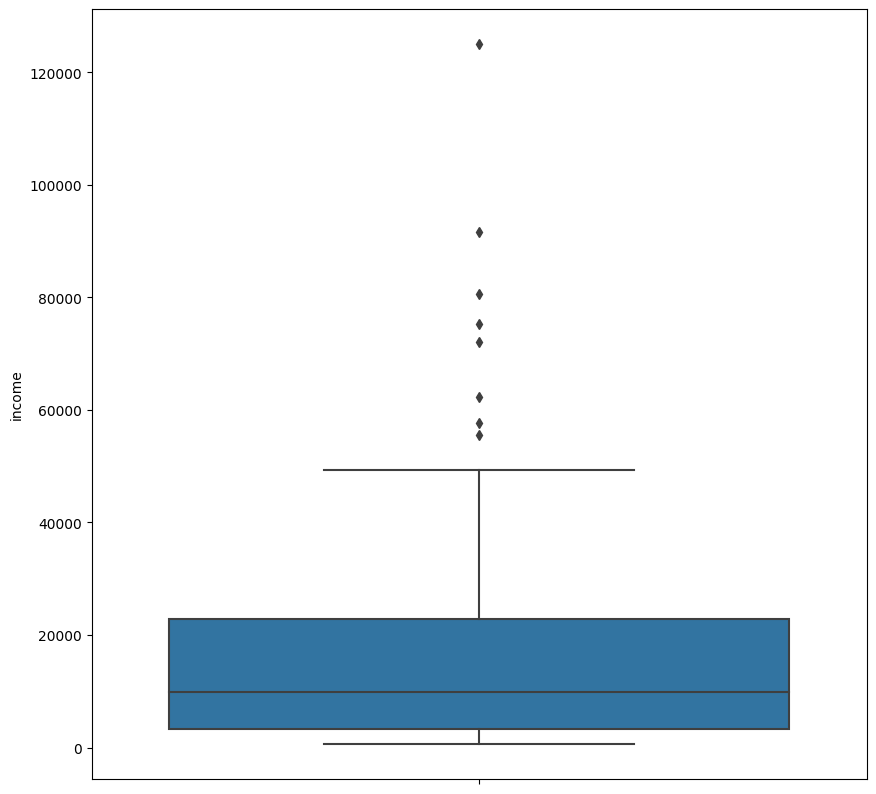

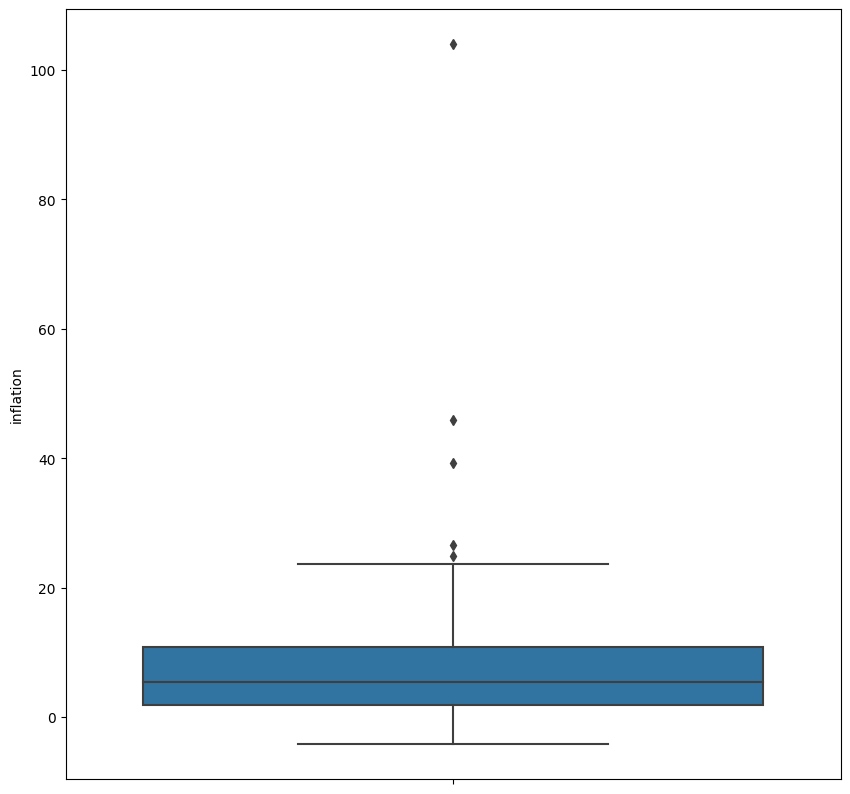

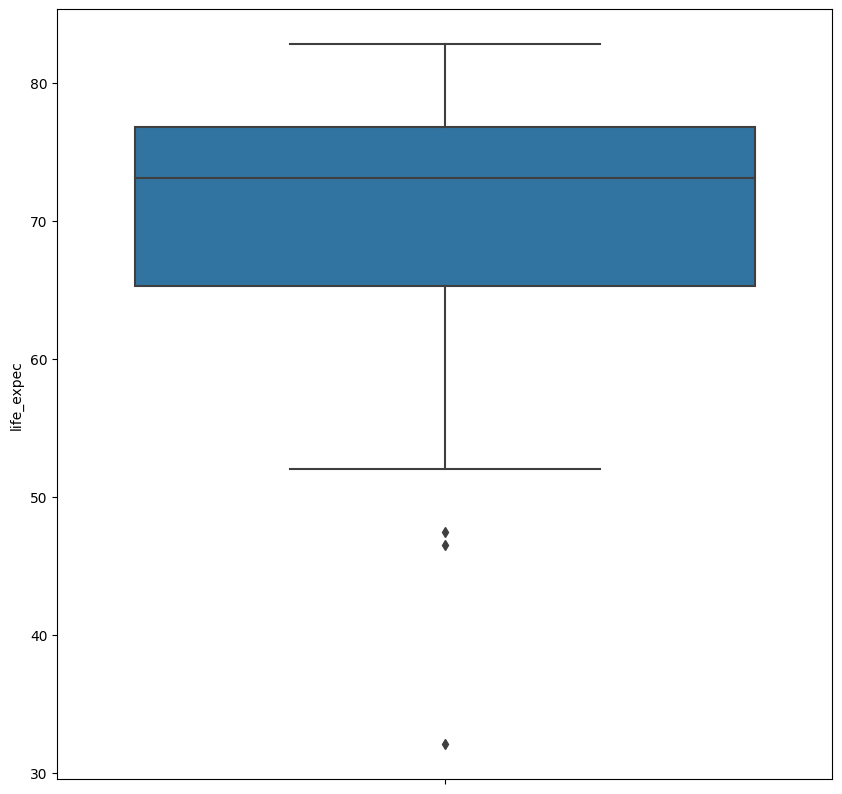

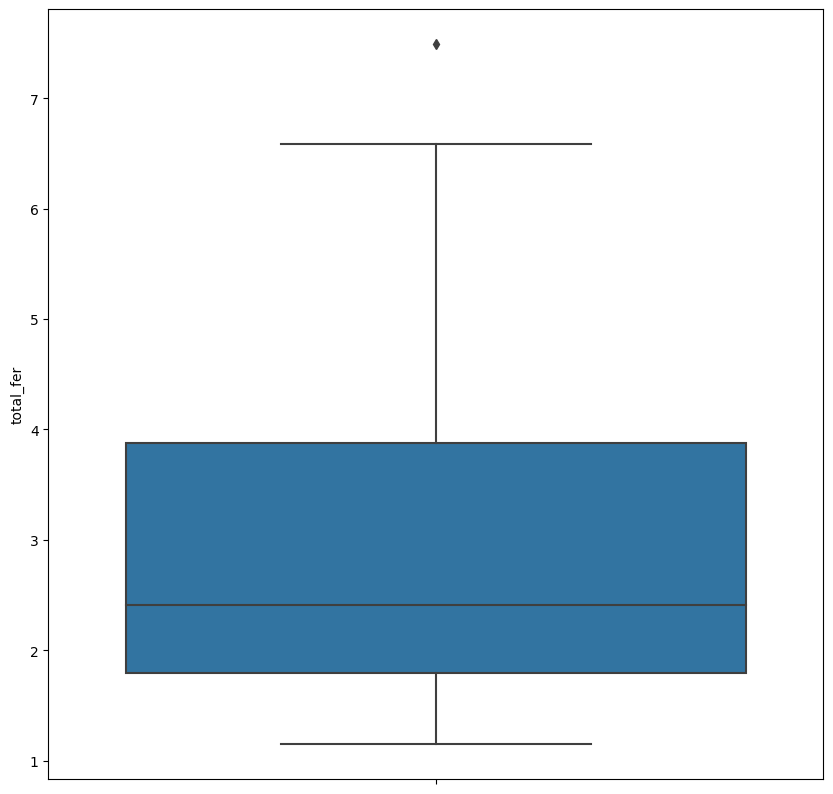

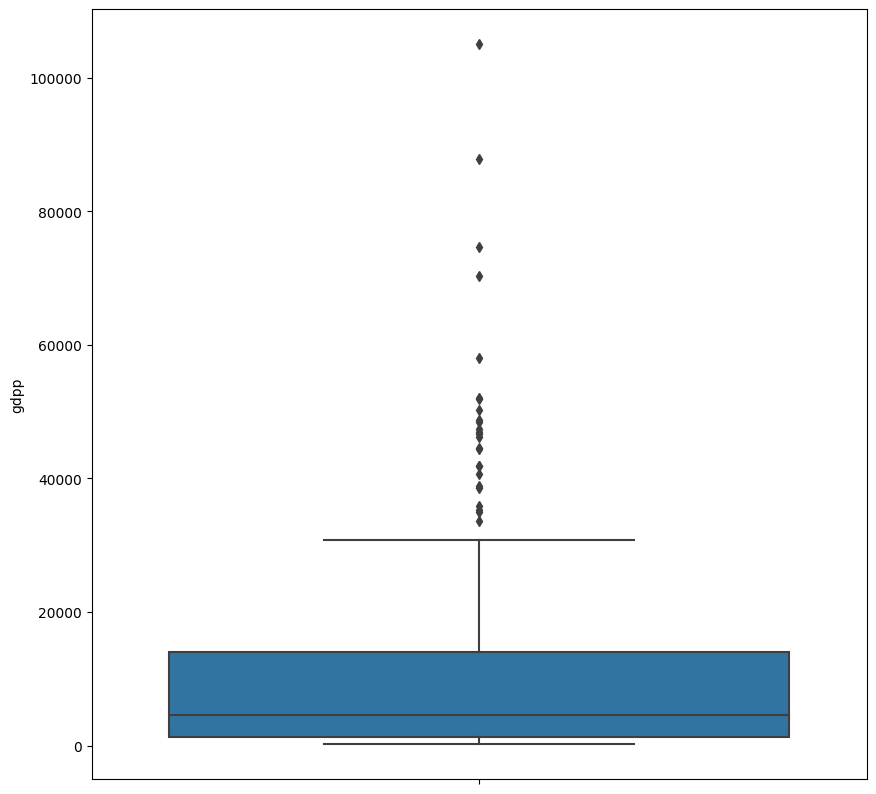

In [7]:
int_columns = df_country.select_dtypes(exclude='object').columns
for _ in int_columns:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df_country, y = _)
    plt.show()

In [8]:
df_country.sort_values('inflation',ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.000,60.5,5.84,2330
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.900,75.4,2.47,13500
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.500,71.1,6.23,3600
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100
...,...,...,...,...,...,...,...,...,...,...
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700


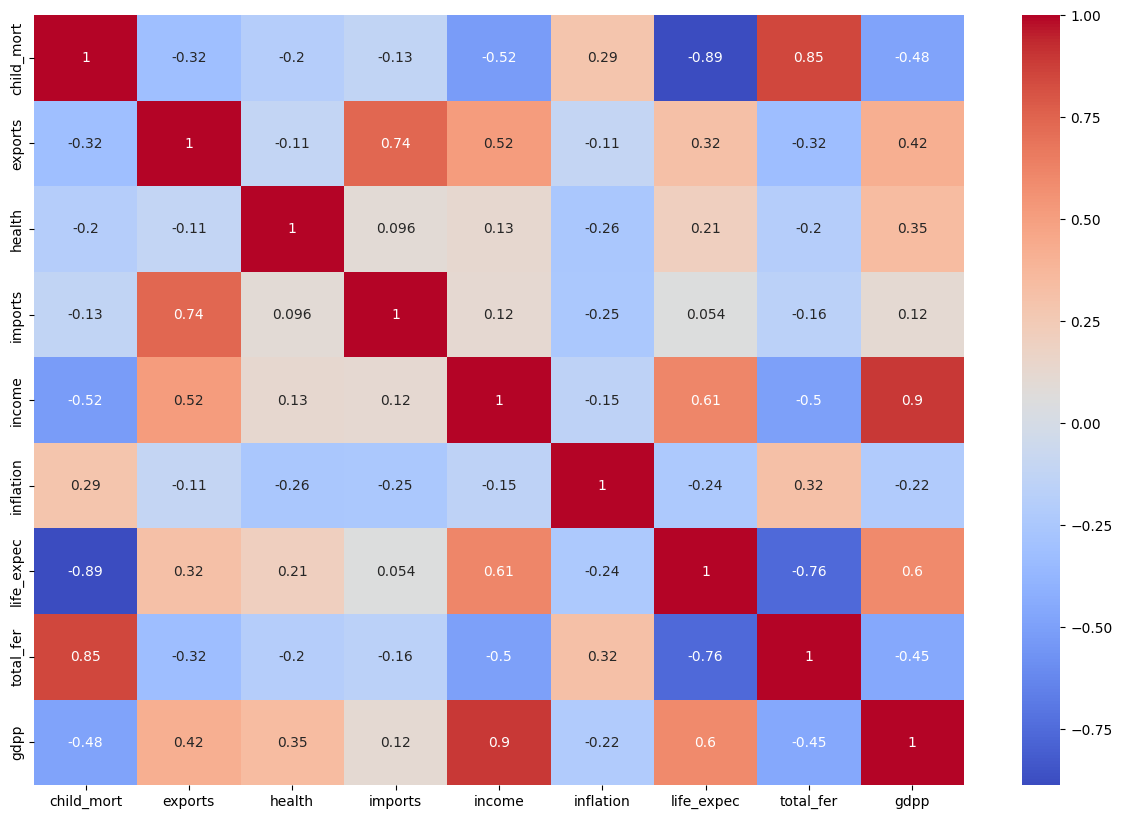

In [9]:
fig = plt.figure(figsize=(15,10))
numeric_corr = df_country.corr(numeric_only=True)
sns.heatmap(data=numeric_corr,annot=True, cmap='coolwarm')
plt.show()

## Escalar datos

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country.drop('country',axis=1))

In [11]:
df_country_scaled = pd.DataFrame(
    data= df_country_scaled
)
df_country_scaled.columns = int_columns
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## PCA

In [12]:
from sklearn.decomposition import PCA


In [13]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [14]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


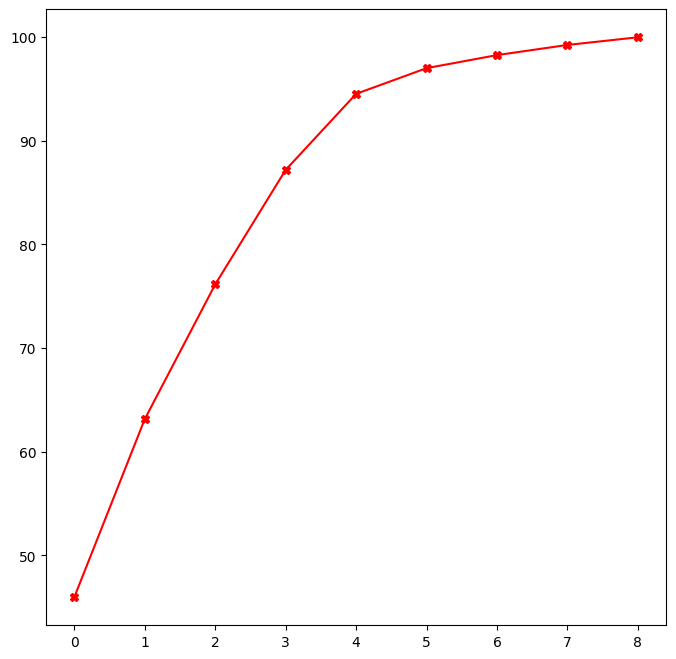

In [15]:
cum_var = np.cumsum(np.round(var,decimals=4)*100)
plt.figure(figsize=(8,8))
plt.plot(cum_var, color='red',marker='X')
plt.show()

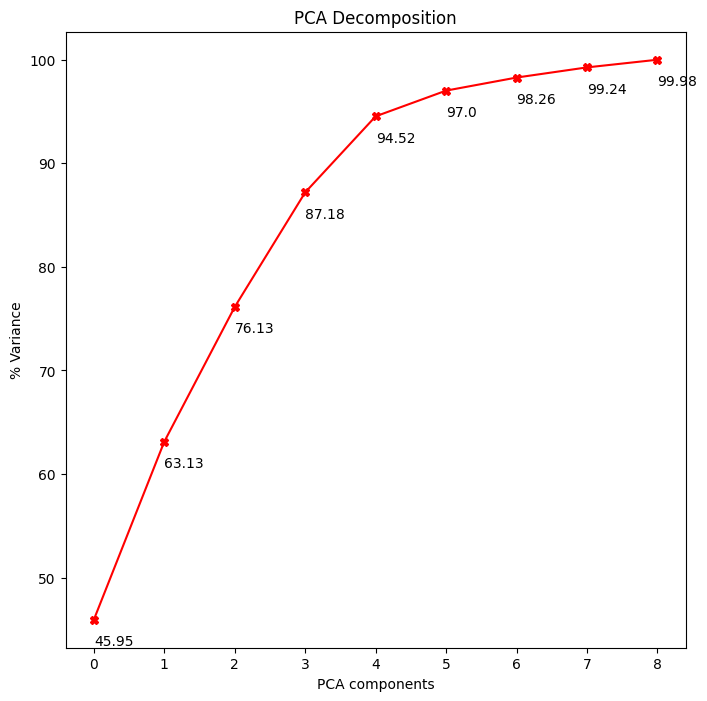

In [16]:
cum_var = np.cumsum(np.round(var,decimals=4)*100)
components = list(range(0,9))
plt.figure(figsize=(8,8))
for s,d in zip(components,cum_var):
    plt.annotate(np.round(d,decimals=2),xy=(s,d-2.5))
plt.plot(components,cum_var, color='red',marker='X')
plt.title('PCA Decomposition')
plt.xlabel('PCA components')
plt.ylabel('% Variance')
plt.show()

Se puede observar que con cuatro componentes principales se puede explicar el 87.18% de los datos, por lo cual se va opta por trabajar sólo con estos datos.

In [17]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8],axis=1,inplace=True)


## Importar librerías para clustering

In [18]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

## K-means

### PCA

In [19]:
sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters=_,n_init=10)
    y = km.fit_predict(pca_data_standard)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

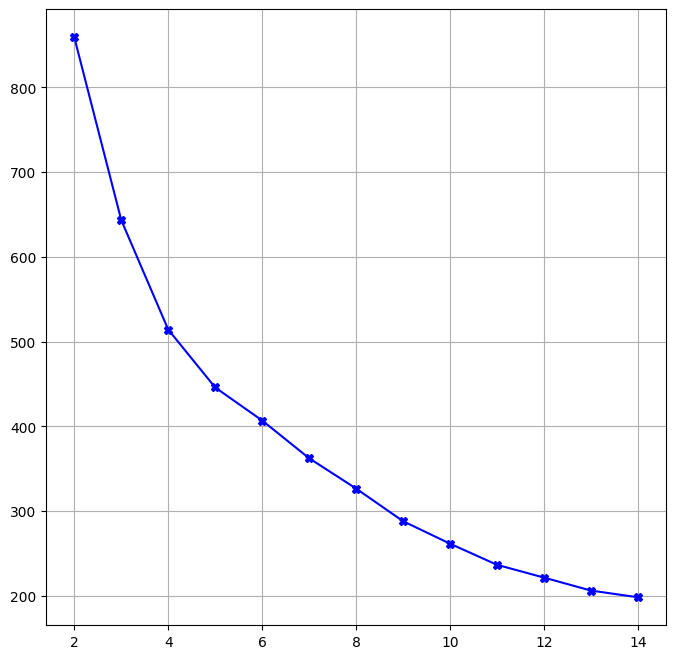

In [20]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,sum_of_squared_distances,color='blue',marker='X')
plt.grid()
plt.show()


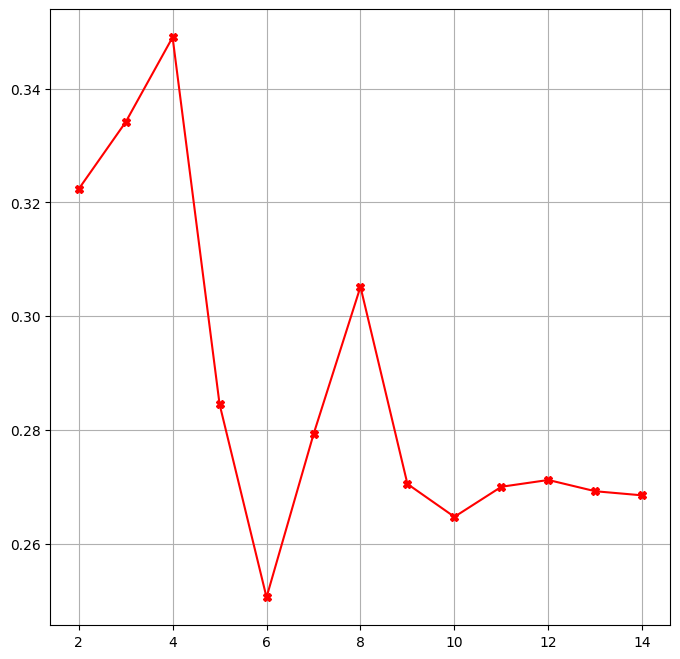

In [21]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,silhouette_scores,color='red',marker='X')
plt.grid()
plt.show()

Se puede observar que es suficiente utilizar 4 clusters para agrupar los datos cuando se usa Kmeans con PCA

In [22]:
km = KMeans(n_clusters=4,n_init=10)
y_kmeans_pca = km.fit_predict(pca_data_scaled)
print(silhouette_score(pca_data_standard,y_kmeans_pca ))
df_country['kmeans_pca'] = y_kmeans_pca 

0.3464042017614361


### Sin PCA

In [23]:
sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters=_,n_init=10)
    y = km.fit_predict(df_country_scaled)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled,y))

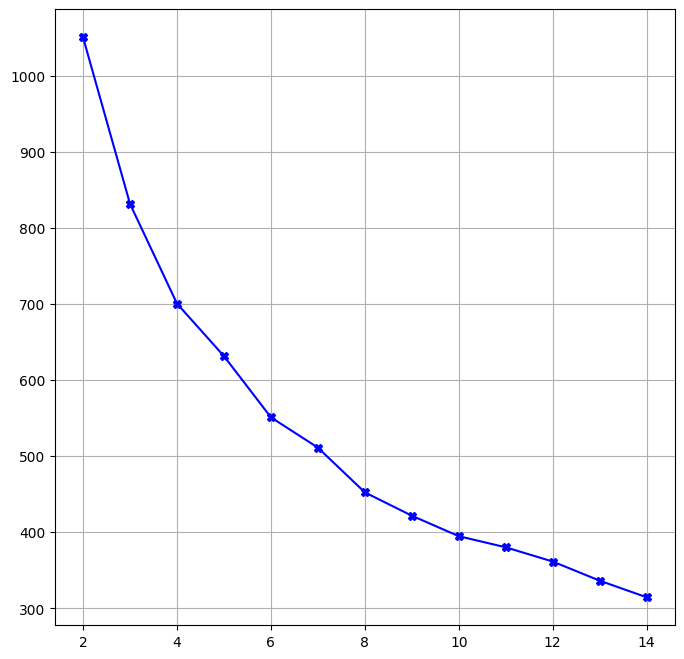

In [24]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,sum_of_squared_distances,color='blue',marker='X')
plt.grid()
plt.show()

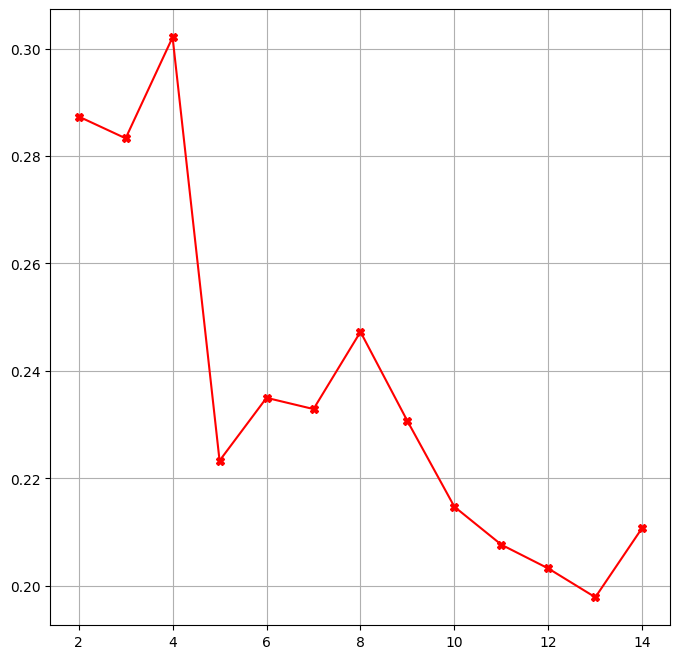

In [25]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,silhouette_scores,color='red',marker='X')
plt.grid()
plt.show()

Se puede observar que se requieren 5 clusters para agrupar los datos cuando se usa Kmeans sin PCA

In [26]:
km = KMeans(n_clusters=5,n_init=10)
y_kmeans = km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_kmeans))
df_country['kmeans'] = y_kmeans 

0.2175075087297438


## Agglomerativen hierarchical clustering

### PCA

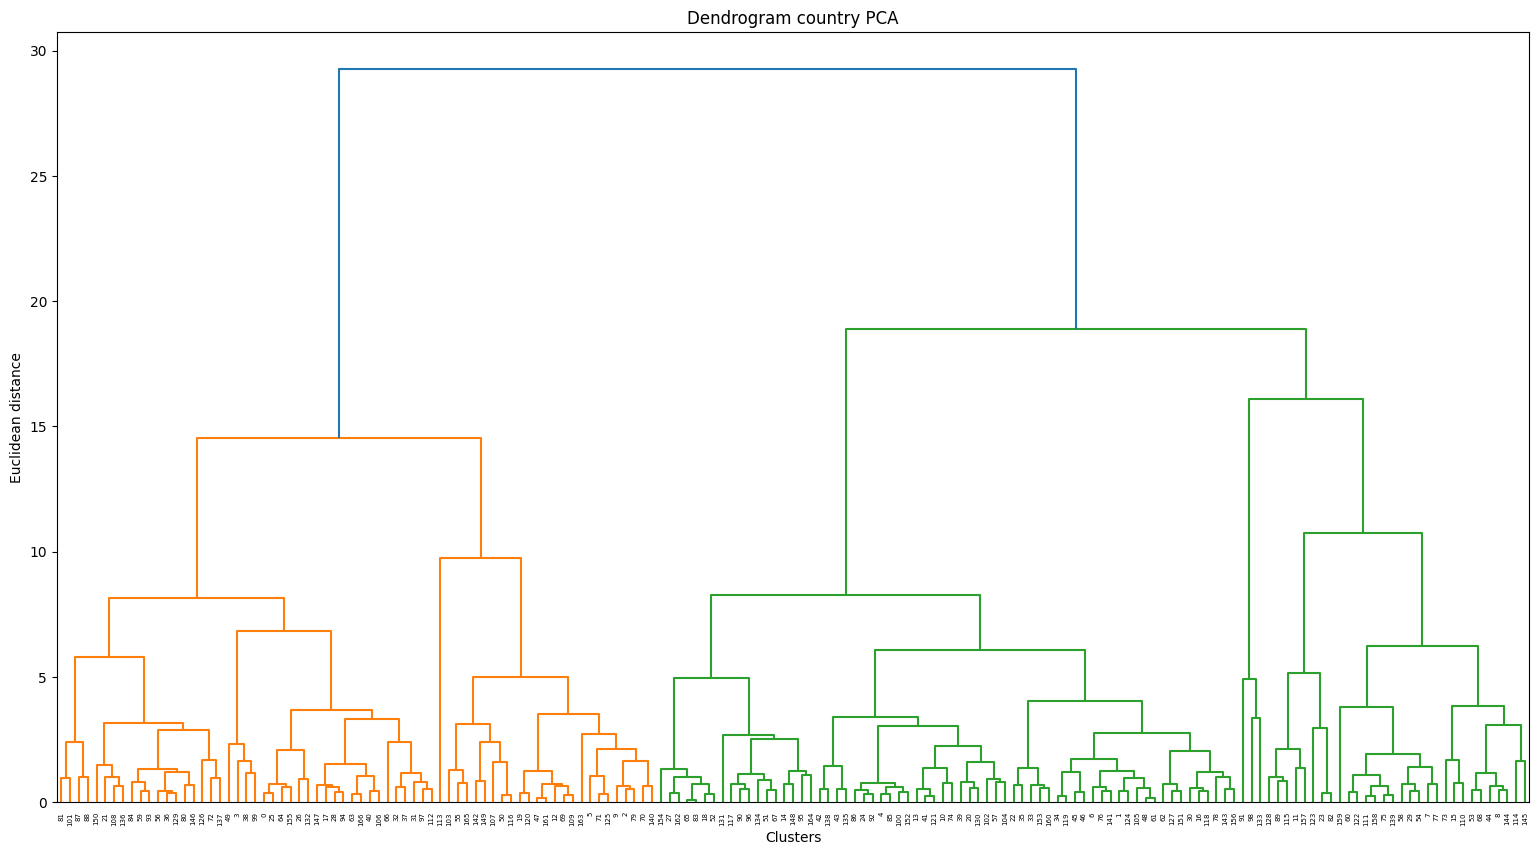

In [27]:
fig = plt.figure(figsize=(19,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard,method='ward'))
plt.title('Dendrogram country PCA')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [28]:
hc_pca = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc_pca = hc_pca.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_hc_pca))
df_country['hc_pca'] = y_hc_pca

0.3070110704080526


/home/nico9779/anaconda3/envs/clustering/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Sin PCA

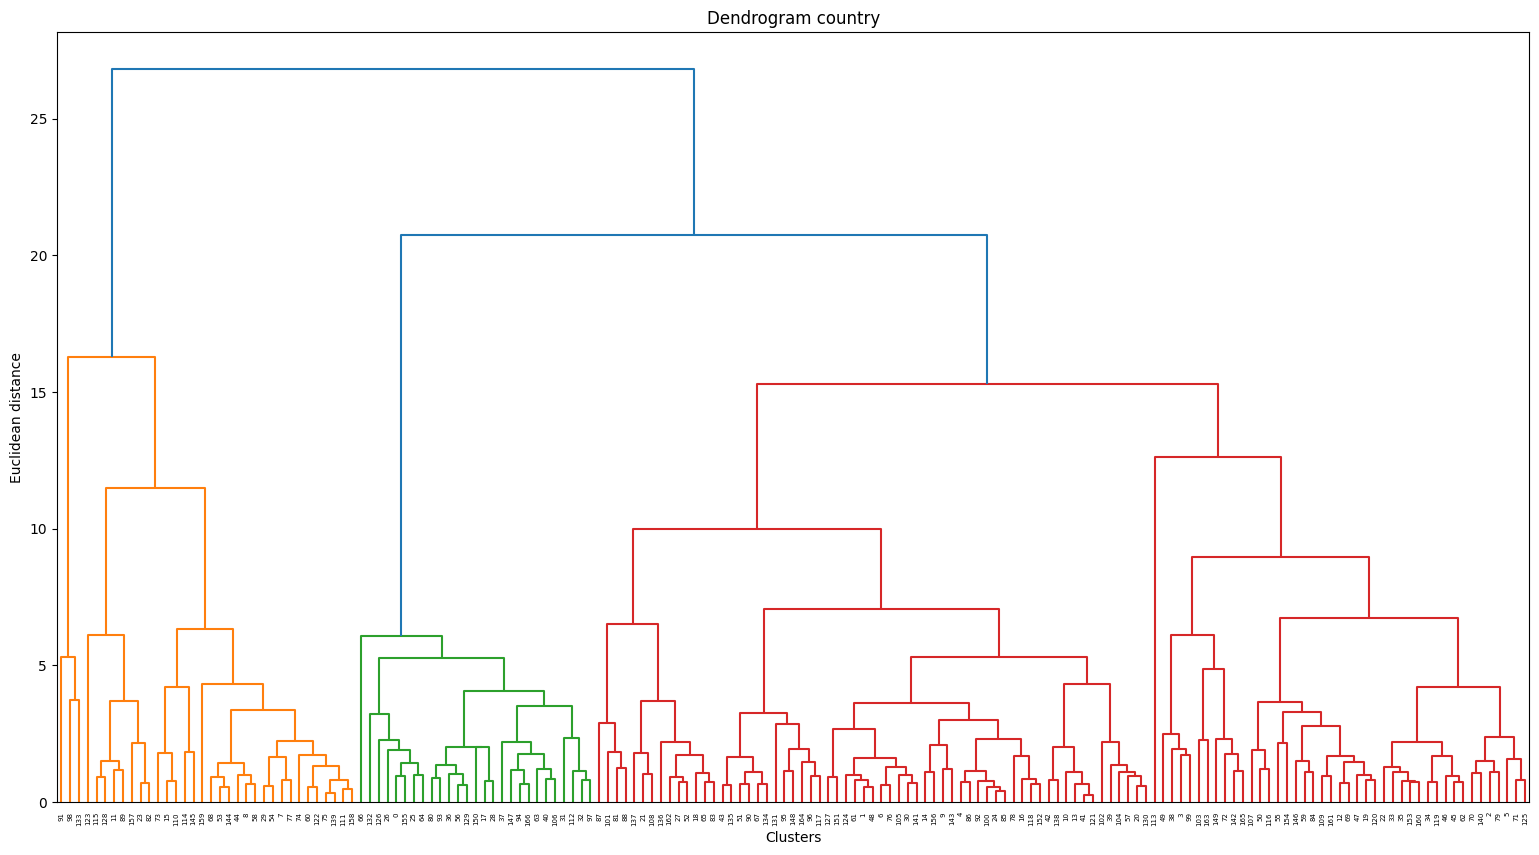

In [29]:
fig = plt.figure(figsize=(19,10))
dendrogram_plot = dendrogram(linkage(df_country_scaled,method='ward'))
plt.title('Dendrogram country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [30]:
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_hc))
df_country['hc'] = y_hc

0.3153134331018189


/home/nico9779/anaconda3/envs/clustering/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## DBSCAN

### PCA

In [48]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, index = neighbors_fit.kneighbors(pca_data_standard)

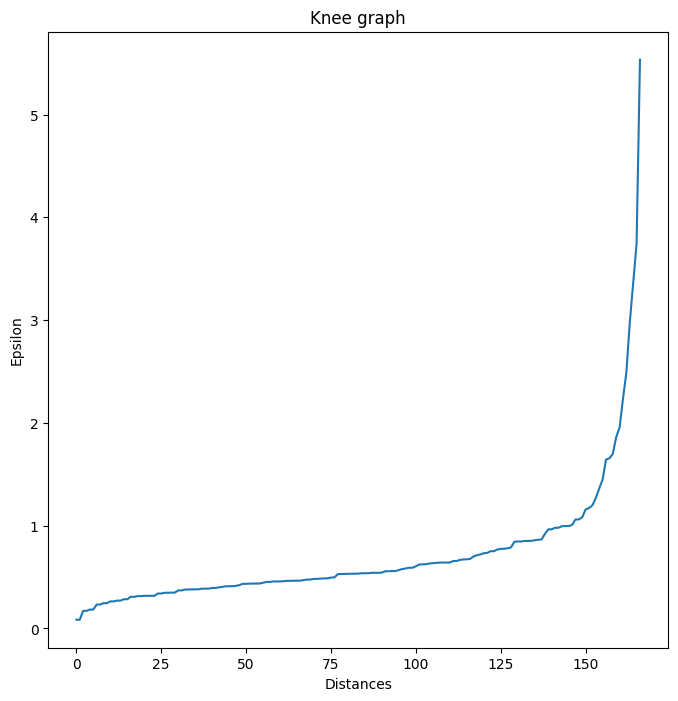

In [49]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
fig = plt.figure(figsize=(8,8))
plt.plot(distances)
plt.title('Knee graph')
plt.xlabel('Distances')
plt.ylabel('Epsilon')
plt.show()

In [51]:
eps_values = np.arange(0.5,2.0,0.1)
min_samples_values = np.arange(3,12)

In [53]:
from itertools import product
dbscan_params = list(product(eps_values,min_samples_values))
n_cluster = []
silhouette_scores = []
for p in dbscan_params:
    y_dbscan_pca = DBSCAN(eps=p[0],min_samples=p[1]).fit_predict(pca_data_standard)
    try :
        silhouette_scores.append(silhouette_score(pca_data_standard,   y_dbscan_pca))
    except:
        silhouette_scores.append(0)
    n_cluster.append(len(np.unique(y_dbscan_pca)))

In [59]:
df_param_pca_tunning = pd.DataFrame.from_records(dbscan_params,columns=['Eps','Min_samples'])
df_param_pca_tunning['sil_score'] = silhouette_scores
df_param_pca_tunning['n_cluster'] = n_cluster

In [62]:
pivot_sil_score_pca = pd.pivot_table(df_param_pca_tunning,values = 'sil_score',columns='Eps',index='Min_samples')
pivot_n_cluster_pca = pd.pivot_table(df_param_pca_tunning,values = 'n_cluster',columns='Eps',index='Min_samples')

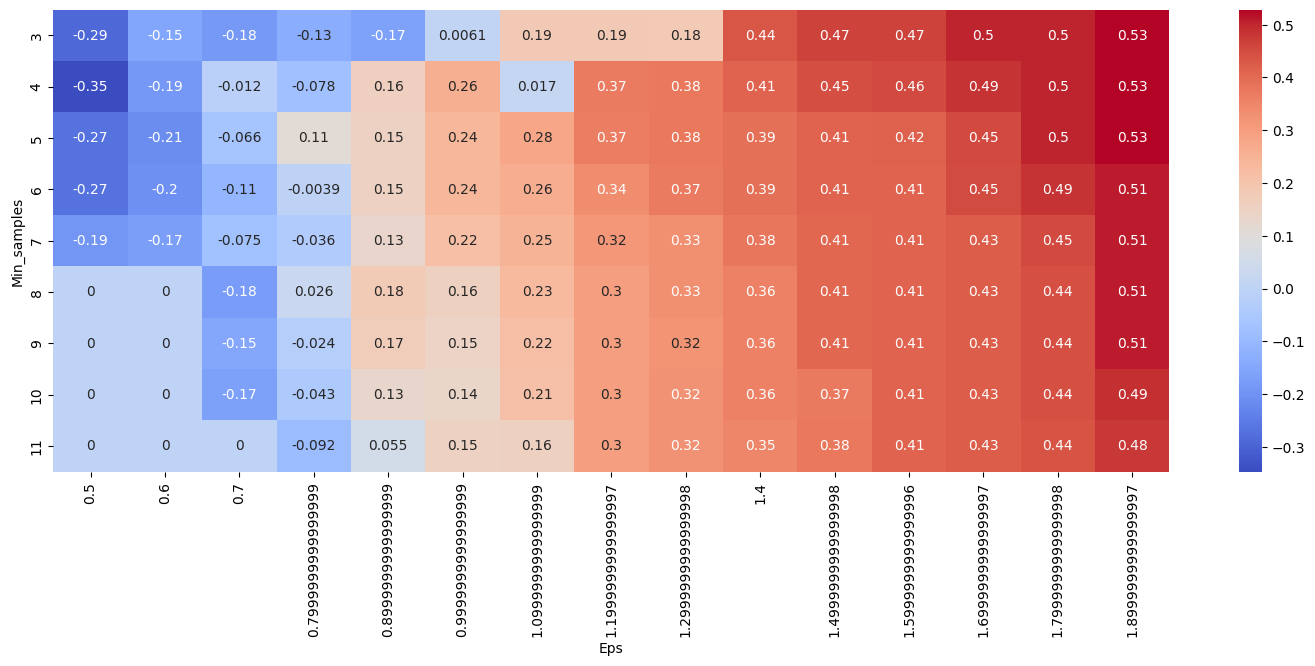

In [65]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_sil_score_pca, annot =True, annot_kws={'size':10},cmap='coolwarm', ax = ax )
plt.show()

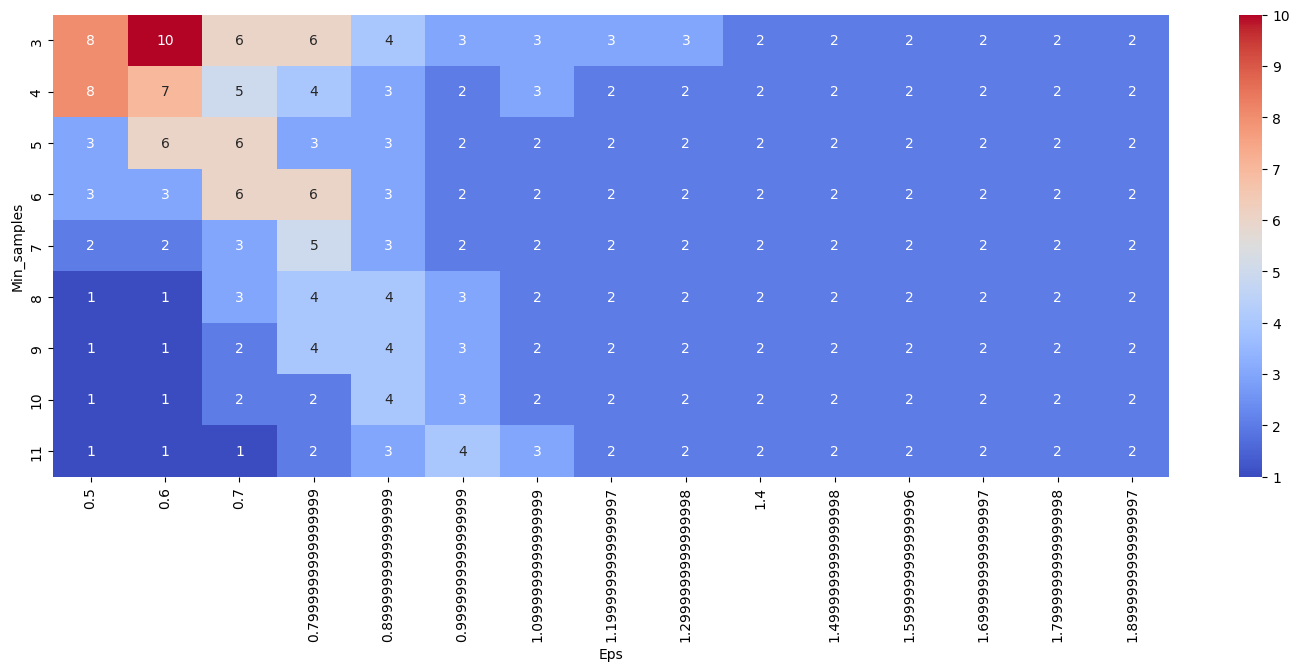

In [66]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_n_cluster_pca, annot =True, annot_kws={'size':10},cmap='coolwarm', ax = ax )
plt.show()

Debido a que para tener altos coeficientes de silueta se crean pocos clusters, se opta por tomar unos hiperparámetros mas ajustados, que tengan un balance entre numero de cluster, baja cantidad de puntos minimos, bajo epsilon y el mayor coeficiente que les acompañe, en este caso la mejor opción es la que tiene las siguientes caracteristicas:

- **Min_samples**: 3
- **Eps**: 1.099

In [70]:
dbscan_train_pca = DBSCAN(eps=1.1,min_samples=3)
y_dbscan_pca = dbscan_train_pca.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_dbscan_pca))
df_country['dbscan_pca'] = y_dbscan_pca

0.186189124428695


### Sin PCA

In [72]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaled)
distances, index = neighbors_fit.kneighbors(df_country_scaled)

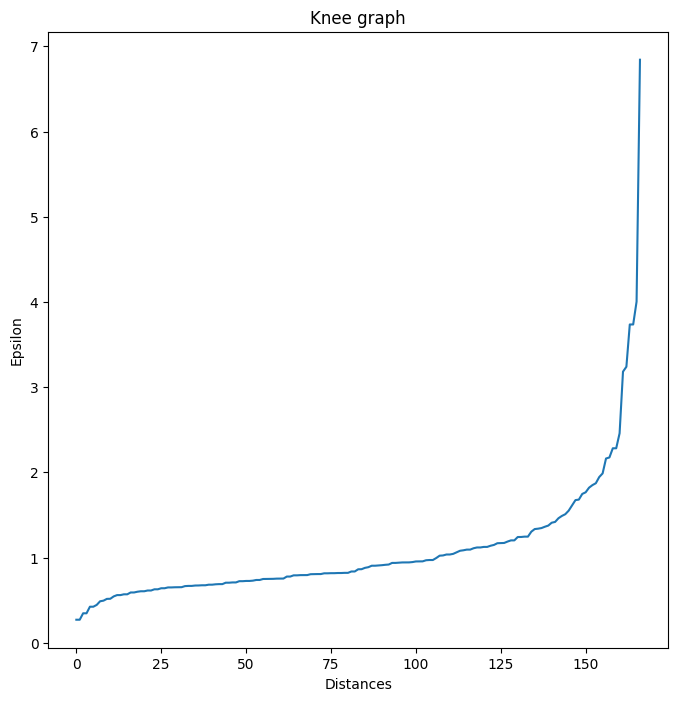

In [73]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
fig = plt.figure(figsize=(8,8))
plt.plot(distances)
plt.title('Knee graph')
plt.xlabel('Distances')
plt.ylabel('Epsilon')
plt.show()

In [74]:
eps_values = np.arange(1.0,3.0,0.1)
min_samples_values = np.arange(3,12)

In [75]:
from itertools import product
dbscan_params = list(product(eps_values,min_samples_values))
n_cluster = []
silhouette_scores = []
for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0],min_samples=p[1]).fit_predict(df_country_scaled)
    try :
        silhouette_scores.append(silhouette_score(df_country_scaled, y_dbscan))
    except:
        silhouette_scores.append(0)
    n_cluster.append(len(np.unique(y_dbscan)))

In [76]:
df_param_tunning = pd.DataFrame.from_records(dbscan_params,columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = silhouette_scores
df_param_tunning['n_cluster'] = n_cluster

In [77]:
pivot_sil_score = pd.pivot_table(df_param_tunning,values = 'sil_score',columns='Eps',index='Min_samples')
pivot_n_cluster = pd.pivot_table(df_param_tunning,values = 'n_cluster',columns='Eps',index='Min_samples')

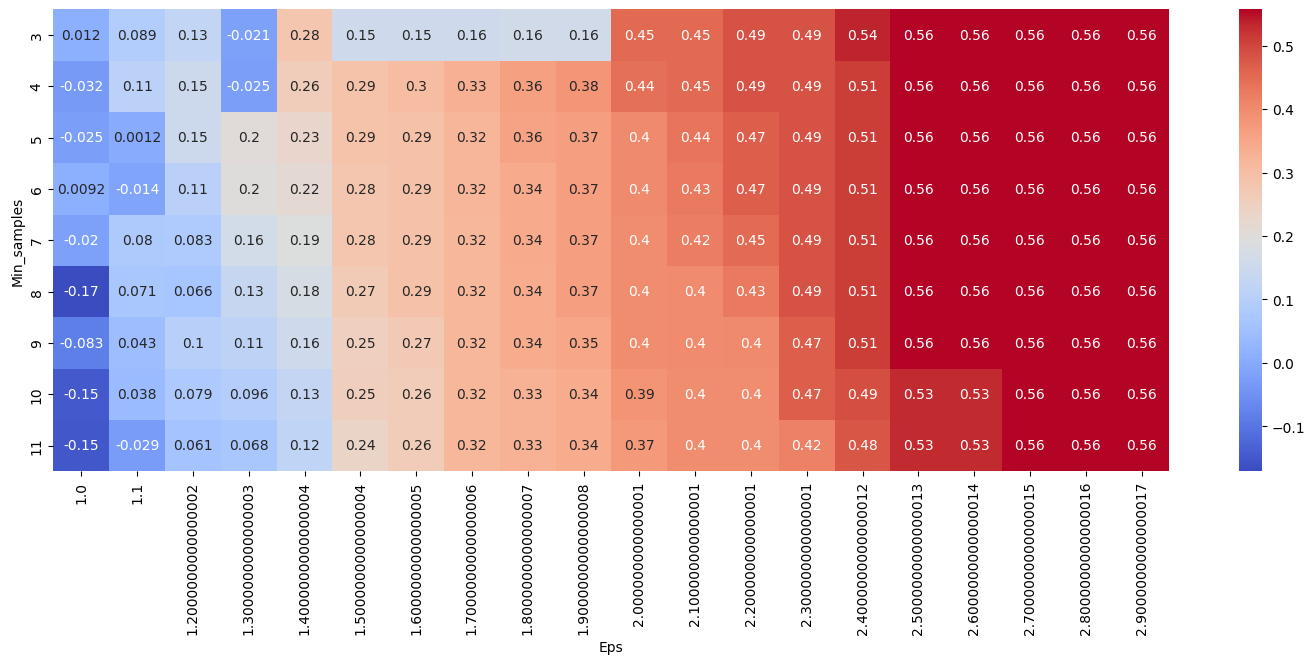

In [78]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_sil_score, annot =True, annot_kws={'size':10},cmap='coolwarm', ax = ax )
plt.show()

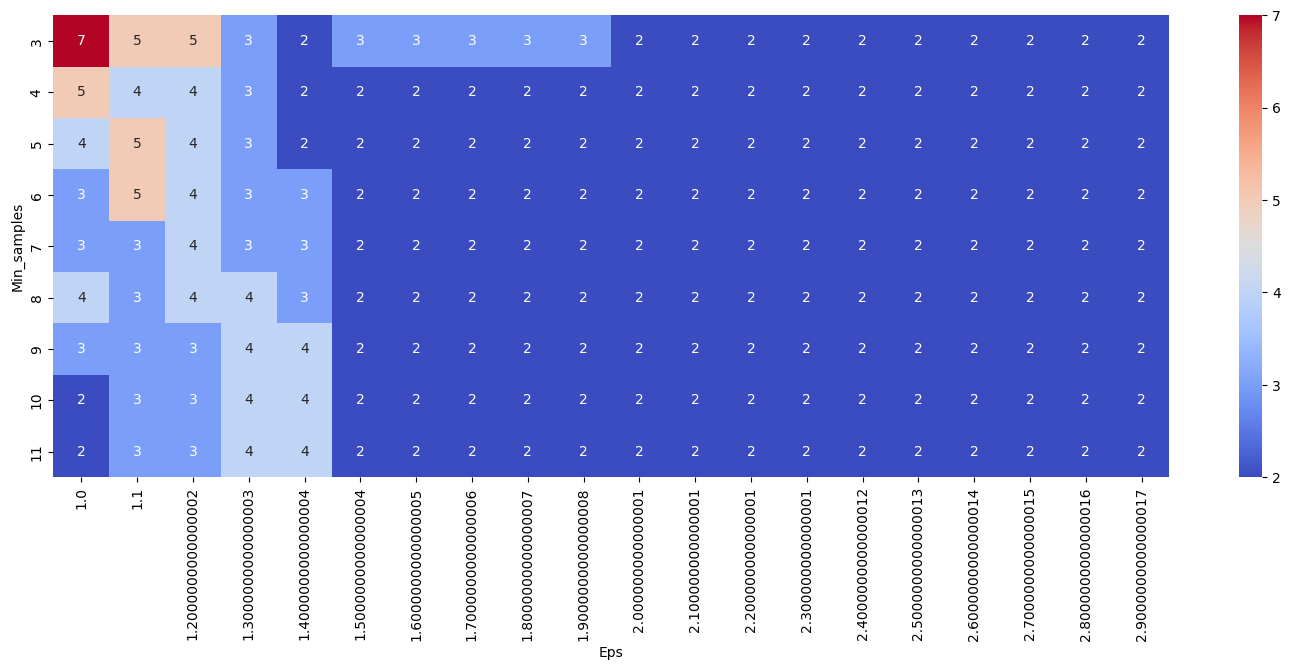

In [79]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_n_cluster, annot =True, annot_kws={'size':10},cmap='coolwarm', ax = ax )
plt.show()

En el caso de no usar PCA, para tener altos coeficientes de silueta se crean pocos clusters, se opta por tomar unos hiperparámetros mas ajustados, que tengan un balance entre numero de cluster, baja cantidad de puntos minimos, bajo epsilon y el mayor coeficiente que les acompañe, en este caso la mejor opción es la que tiene las siguientes caracteristicas:

- **Min_samples**: 6
- **Eps**: 1.4

In [85]:
dbscan_train = DBSCAN(eps=1.4,min_samples=6)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_dbscan))
df_country['dbscan_cluster'] = y_dbscan

0.21539651251091044


## Evaluación de resultados

In [90]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0,0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1,1,0,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2,1,0,-1,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,1,0,0,0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,1,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,0,0,0,0,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,2,1,0,0,0


In [87]:
df_country.columns 

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'kmeans_pca', 'kmeans',
       'hc_pca', 'hc', 'dbscan_pca', 'dbscan_cluster'],
      dtype='object')

In [88]:
df_country[['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'kmeans_pca']]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


/home/nico9779/anaconda3/envs/clustering/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


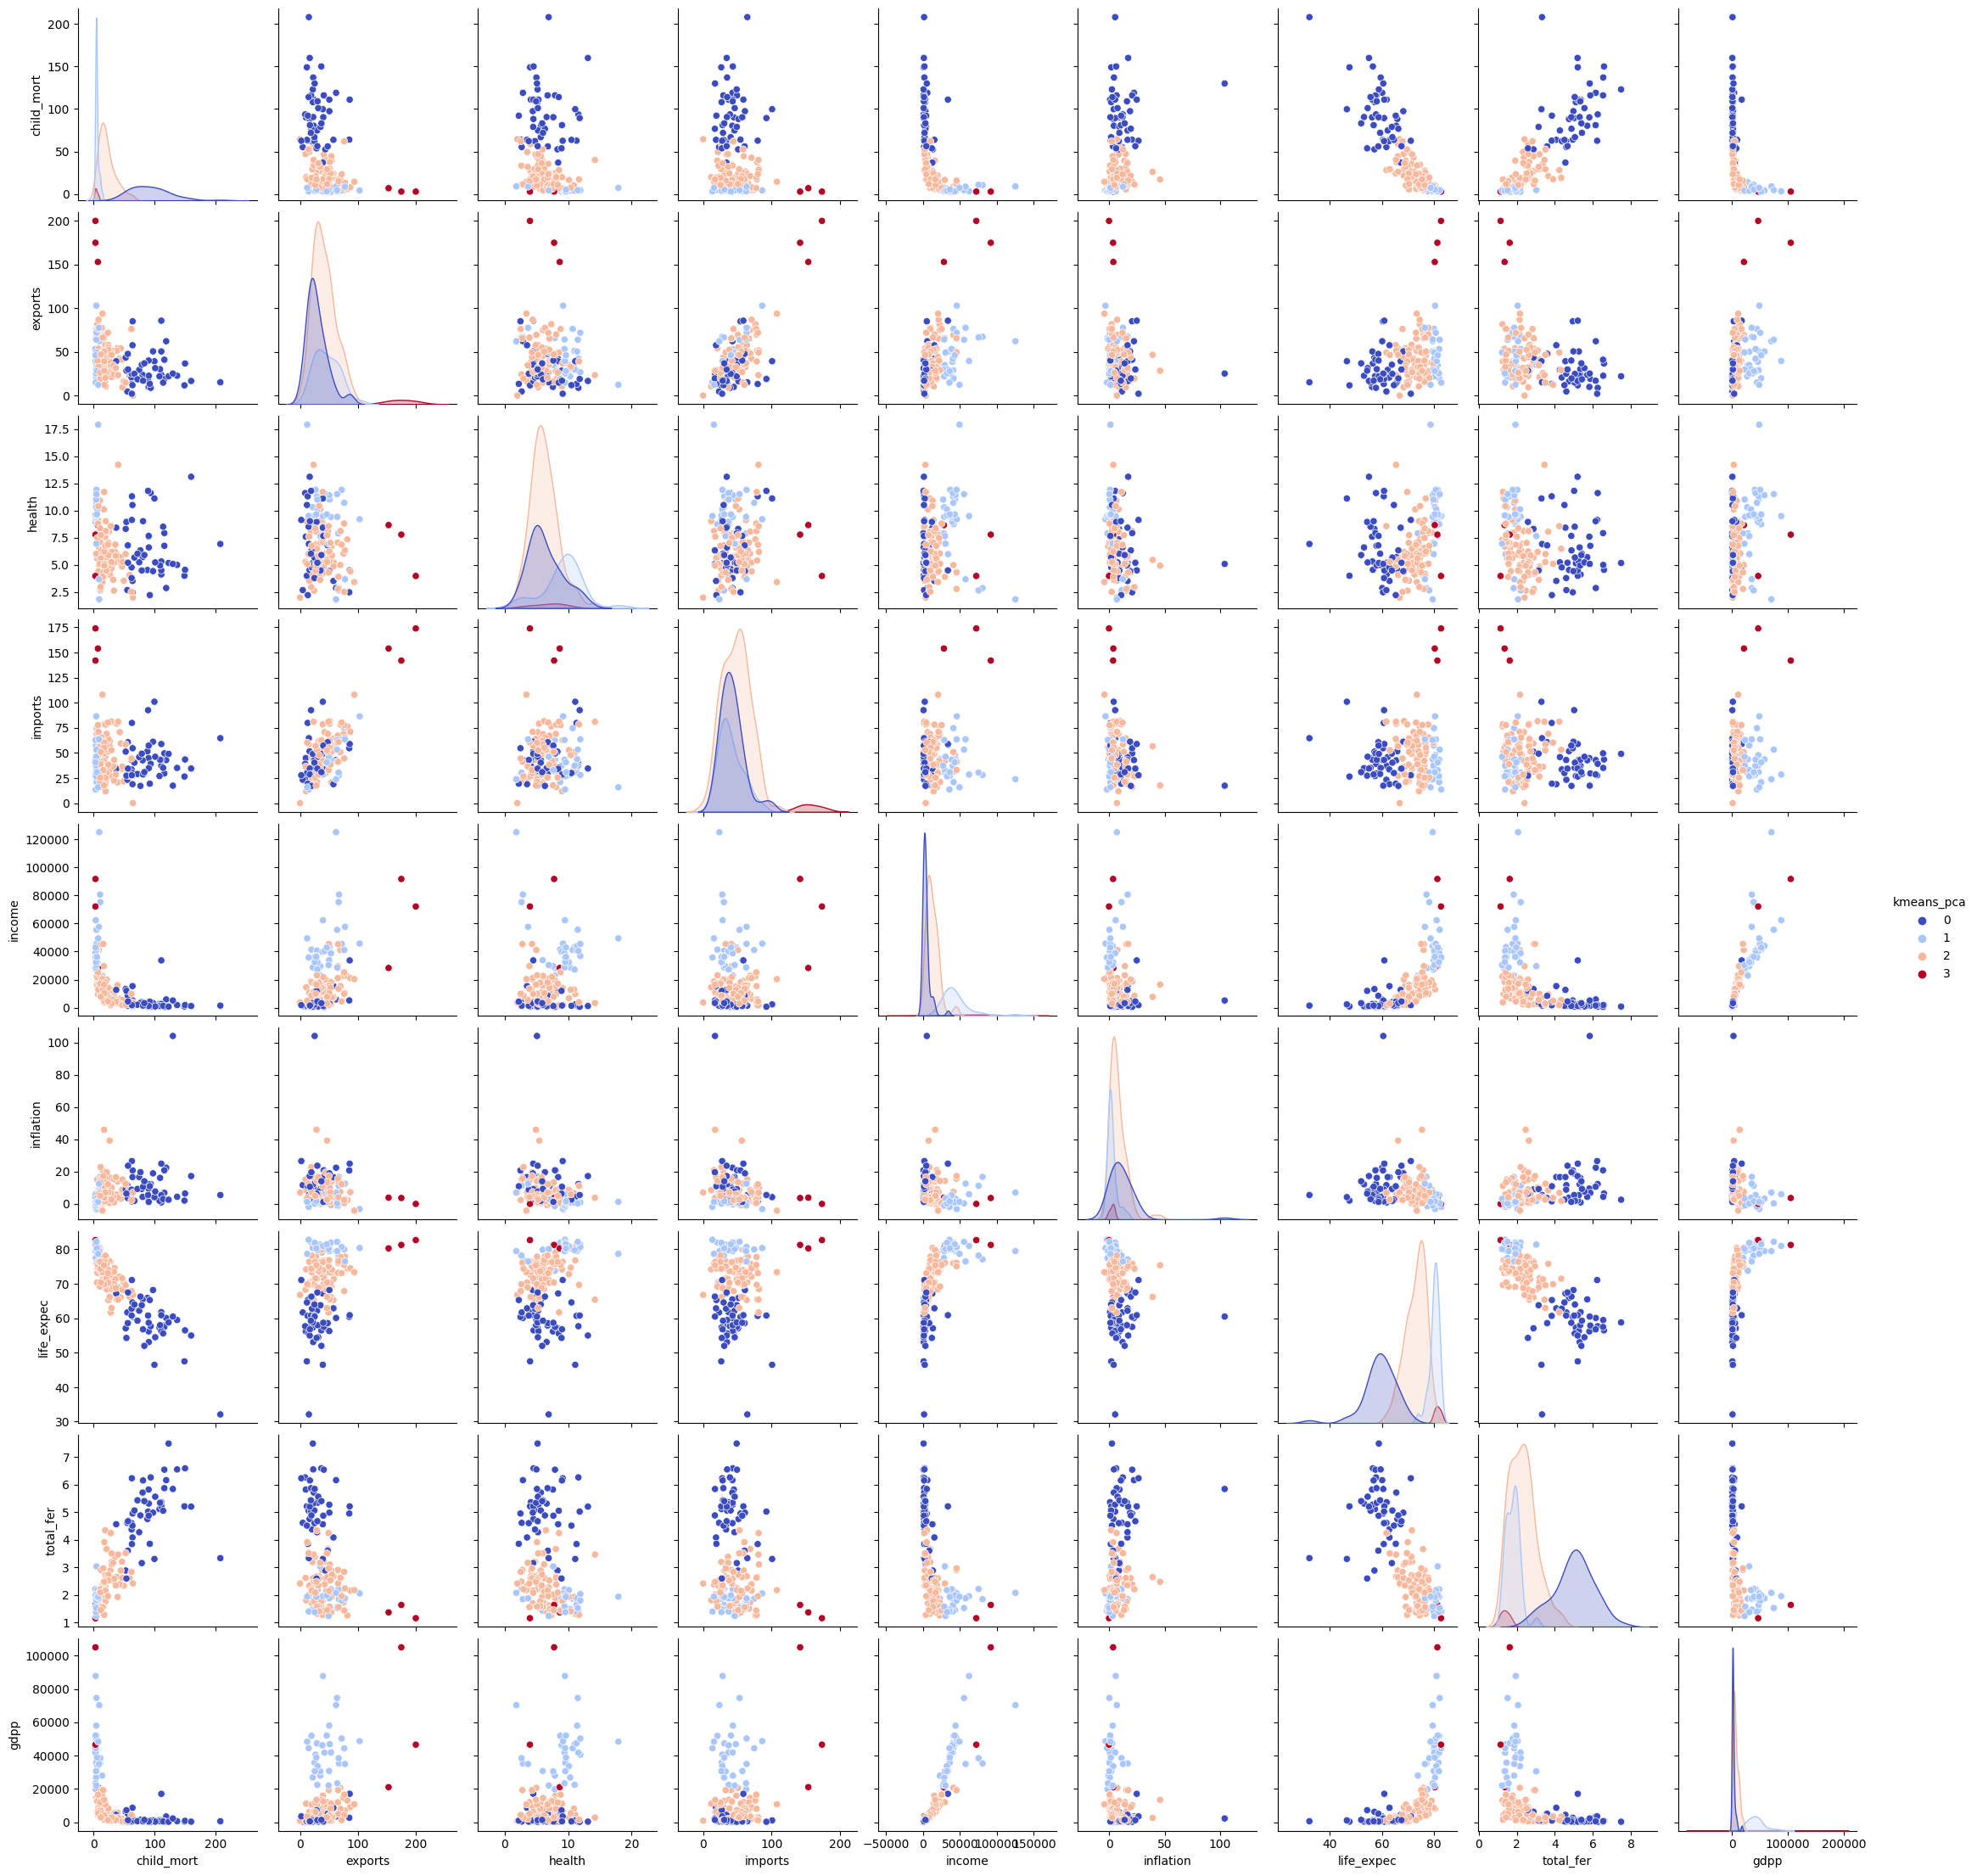

In [94]:
sns.pairplot(data = df_country[['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'kmeans_pca']],hue='kmeans_pca', palette='coolwarm')

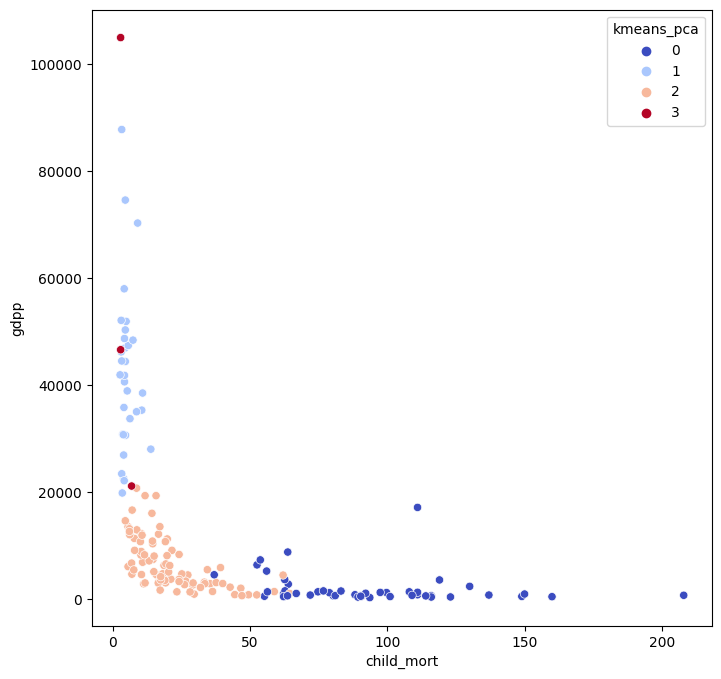

In [96]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data = df_country,x='child_mort',y='gdpp',hue='kmeans_pca',palette='coolwarm')
plt.show()

Se puede como se pueden observar los paises según sus respectivos clusters

In [97]:
df_country[df_country['kmeans_pca']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0,2,1,0,0,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0,2,1,0,-1,-1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0,2,1,0,0,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0,1,1,0,0,-1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0,2,1,0,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0,2,1,0,0,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0,2,1,0,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0,2,1,0,0,-1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0,2,1,0,0,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0,2,1,0,0,0


In [98]:
df_country[df_country['kmeans_pca']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,hc_pca,hc,dbscan_pca,dbscan_cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1,3,0,1,0,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1,3,0,1,0,1
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1,0,0,0,0,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1,3,0,1,0,-1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1,3,0,1,-1,-1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1,3,0,1,0,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1,0,0,0,0,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1,0,0,0,0,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1,3,0,1,0,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1,3,0,1,0,1


In [99]:
df_country[df_country['kmeans_pca']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,hc_pca,hc,dbscan_pca,dbscan_cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0,0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1,1,0,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0,0,0,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2,1,1,0,0,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,2,1,0,0,0,1
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,2,1,1,0,0,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,1,0,0,0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,1,1,0,-1,-1


In [100]:
df_country[df_country['kmeans_pca']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,hc_pca,hc,dbscan_pca,dbscan_cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,4,0,1,-1,-1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3,4,0,1,-1,-1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3,4,0,1,-1,-1
